In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from numpy.random import seed

class AdalineSGD():
    def __init__(self, eta=0.01, n_iter=10,shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        if random_state:
            seed(random_state)

    def fit(self, X, y):
        self.w_ = np.zeros(1+X. shape[1])
        self.cost_ = []

        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                output = self.net_input(xi)
                error = (target-output)
                self.w_[1:] += self.eta * xi.dot(error)
                self.w_[0] += self.eta * error
                cost.append(0.5*error**2)

            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self

    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def net_input(self, X):
        return np. dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) > self.thresholds, 1, -1)

In [3]:
df = pd.read_csv('../input/iris.data', header=None)

y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

In [4]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

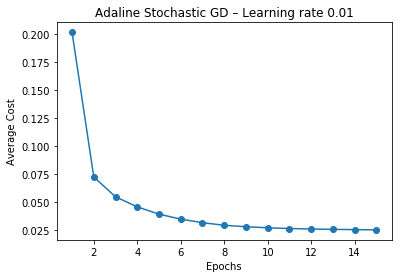

In [5]:
adal = AdalineSGD(eta=0.01, n_iter=15, random_state=1).fit(X_std, y)
plt.plot(range(1, len(adal.cost_) + 1), adal.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.title('Adaline Stochastic GD – Learning rate 0.01')
plt.show()